# Make crops, not war

# Table of Contents
<div class="toc"><ul class="toc-item">
<ul >
<li><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1">Data Wrangling</a></li>
    <ul ><li><a href="#Size" data-toc-modified-id="Data-Wrangling-1.1">Size</a></li>
                        <ul>
                            <li><a href="#Wars-Datasets" data-toc-modified-id="Data-Wrangling-1.1.1">Wars Datasets</a></li>
                            <li><a href="#Agriculture-and-Food-Datasets" data-toc-modified-id="Data-Wrangling-1.1.2">Agriculture and Food Datasets</a></li></ul>
                      <li><a href="#Formats" data-toc-modified-id="Data-Exploration-1.2">Format</a></li>
                        <ul>
                            <li><a href="#Wars" data-toc-modified-id="Data-Exploration-1.2.1">Wars Datasets</a></li>
                            <li><a href="#Agriculture-and-Food-Datasets" data-toc-modified-id="Data-Exploration-1.2.2">Agriculture and Food Datasets</a></li></ul>
                      <li><a href="#Missing-values" data-toc-modified-id="Data-Exploration-1.3">Missing values</a></li>
                        <ul>
                            <li><a href="#Wars" data-toc-modified-id="Data-Exploration-1.3.1">Wars Datasets</a></li>
                            <li><a href="#Food-Related" data-toc-modified-id="Data-Exploration-1.3.2">Agriculture and Food Datasets</a></li></ul>
    </ul>
 <li><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1">Data Exploration</a></li>
    <ul ><li><a href="#Distributions" data-toc-modified-id="Data-Exploration-1.1">Distributions</a></li>
                        <ul type="circle"><li>War</li><li>Agriculture</li></ul>
                      <li><a href="#Correlations" data-toc-modified-id="Data-Exploration-1.2">Correlations</a></li>
    </ul>   
<li>Our project</li>
    </ul> </div>

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

%matplotlib inline

sns.set_style('whitegrid')

# add time converter for matplotlib visualisation
pd.plotting.register_matplotlib_converters()

# Data Wrangling

## Size

### Wars Datasets

For the data on wars, we are going to use data obtained from **[Wikidata Query Service](https://query.wikidata.org/)**. As we selected only the data in which we are interested in, the **dataset is quite small** as we can see below:

In [114]:
# Set folder name
wikipedia_path = 'data/wikipedia/'

# Set filenames
state_in_war_file = 'states.json'
political_in_war_file = 'political.json'
terroristic_in_war_file = 'terroristic.json'

# Read the files
wars_states_df = pd.read_json(wikipedia_path + state_in_war_file, orient='records', encoding='utf-8')
wars_political_df = pd.read_json(wikipedia_path + political_in_war_file, orient='records', encoding='utf-8')
wars_terroristic_df = pd.read_json(wikipedia_path + terroristic_in_war_file, orient='records', encoding='utf-8')

For now, we are not interested in the **differences** between these three categories, but only between **state and non-state actors**. We therefore only mark whether a participant is state or non-state. Next we stack the dataframes to create a unique one.

In [115]:
# Mark the elements of the DFs as either state or non-state actors
wars_states_df['is_state'] = True
wars_political_df['is_state'] = False
wars_terroristic_df['is_state'] = False

# Stack the dataframes
raw_wars_df = wars_states_df.append(wars_political_df, sort=True).append(wars_terroristic_df, sort=True)

# Rename the columns to a more readable style
renamed_wars_df = raw_wars_df.rename(columns={
    'armed_conflictLabel': 'name',
    'participantLabel': 'participant',
    'countryWarLabel': 'country',
    'locationLabel': 'location'
})

print(f"Length of wars dataframe: {renamed_wars_df.size}")

Length of wars dataframe: 7665


The dataframe can be kept in memory.

### Agriculture and Food Datasets

For food-related data, we are using data from **[FAOSTAT](http://www.fao.org/faostat/en/#data) website**. Here we can query FAO database as well and can download only the datasets we need. Particularly, we are interested in the following datasets:

- [Crops](http://www.fao.org/faostat/en/#data/QC)
- [Live Animals](http://www.fao.org/faostat/en/#data/QA)
- [Annual Population](http://www.fao.org/faostat/en/#data/OA)
- [Land Use](http://www.fao.org/faostat/en/#data/RL)

These **datasets are quite small** and can be kept in memory.

In [116]:
# Set folder name
fao_path = 'data/fao/'

# Set filenames
crops_production_file = 'crops_production.csv'
livestock_production_file = 'livestock_production.csv'
population_file = 'population.csv'
land_use_file = 'land_use.csv'

# Read the files
raw_crops_production_df = pd.read_csv(fao_path + crops_production_file, encoding='latin-1')
raw_livestock_production_df = pd.read_csv(fao_path + livestock_production_file, encoding='latin-1')
raw_population_df = pd.read_csv(fao_path + population_file, encoding='latin-1')
raw_land_use_df = pd.read_csv(fao_path + land_use_file, encoding='latin-1')

# Create an array with the names to iterate over the dataframes
agricultural_dfs_names = ['crops', 'livestock', 'population', 'land']

# Create an array of dataframes to easily iterate over them
agricultural_dfs = [
    raw_crops_production_df,
    raw_livestock_production_df,
    raw_population_df,
    raw_land_use_df
]

# Iterate over names and dataframes to print the size
for name, df in zip(agricultural_dfs_names, agricultural_dfs):
    print(f"Length of {name} dataframe: {df.size}")

Length of crops dataframe: 1437366
Length of livestock dataframe: 472752
Length of population dataframe: 223725
Length of land dataframe: 170100


All these datasets can be easily handled by a laptop.

## Formats

### Wars

Now, let us **check the types** of the columns of the dataframes:

In [117]:
renamed_wars_df.dtypes

name            object
country         object
end_year       float64
is_state          bool
location        object
participant     object
start_year       int64
dtype: object

The other two war dataframes have the same formats. We can see that the years have different types. It can be useful to convert them to `datetime` years. We are doing it after dealing with missing values.

### Agriculture and Food Datasets

In [118]:
for name, df in zip(agricultural_dfs_names, agricultural_dfs):
    print(f"Types in {name} dataframe:\n {df.dtypes}\n")

Types in crops dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

Types in livestock dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

Types in population dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area        

## Missing values

### Wars

Let us check whether there are missing values in the wars dataframe:

In [119]:
print("Number of wars with missing data: " + 
      str(renamed_wars_df[renamed_wars_df.isnull().any(axis=1)].groupby('name').count().shape[0]))

print("Columns with missing data:")
renamed_wars_df.columns[renamed_wars_df.isnull().any()].tolist()

Number of wars with missing data: 35
Columns with missing data:


['country', 'end_year', 'location']

#### Missing end year

Let us check which entries have missing end year:

In [120]:
missing_end_year_wars = (
    # Get the lines missing `end_year`
    renamed_wars_df
        .loc[
            # Get the rows missing end year
            renamed_wars_df['end_year'].isnull(),
            # Select the name and start year
            ['name', 'start_year']
        ]
        # Remove duplicates
        .drop_duplicates()
)

missing_end_year_wars

name  start_year
46                    Shelling of Yeonpyeong        2010
82                          Cabinda Conflict        1975
86                War in North-West Pakistan        2004
90                           Darfur conflict        2003
170                 Kurdish–Turkish conflict        2015
193                            Kivu conflict        2004
304                          Kachin conflict        1961
331                           War in Donbass        2014
348           Iraqi Civil War (2014–present)        2014
352               War in Afghanistan (2015–)        2015
360                 Libyan civil war (2014–)        2014
365  Saudi Arabian-led intervention in Yemen        2015
389                         Manbij offensive        2016
390                         Aleppo offensive        2016
713                            War on Terror        2001
739        Lord's Resistance Army insurgency        1987
743        Insurgency in the Maghreb (2002–)        2002
773                     Gaza–Israel conflict        2006
775               Iran–Israel proxy conflict        2005

Among these wars, only the [Shelling of Yeonpyeong](https://en.wikipedia.org/wiki/Bombardment_of_Yeonpyeong) has come to an end (it has actually a one-day event). All the others are still conflicts which are still ongoing (even the older ones). As a matter of fact, due to how the Wikidata query is made, the wars without an **end date** have not finished yet. Hence, we can fill the value with the last year in FAO dataset, which is 2017:

In [121]:
from datetime import datetime

# Set end year of Shelling of Yeonpyeong to 2010
renamed_wars_df.loc[renamed_wars_df['name'] == 'Shelling of Yeonpyeong', 'end_year'] = 2010

# Set the current year for the other wars which are ongoing
renamed_wars_df.loc[renamed_wars_df['end_year'].isnull(), 'end_year'] = 2017

In [122]:
# Change start year and end year to datetime objects
renamed_wars_df['start_year'] = pd.to_datetime(renamed_wars_df['start_year'], format='%Y')
renamed_wars_df['end_year'] = pd.to_datetime(renamed_wars_df['end_year'].astype(int), format='%Y')

Now, let us see check how many wars are missing the **country** where the war took place:

In [123]:
print("Number of wars with missing country: " + 
      str(renamed_wars_df.loc[renamed_wars_df['country'].isnull(), 'name'].drop_duplicates().shape[0]))

Number of wars with missing country: 21


As there are few, we can fill the country manually, and since we are not interested in the precise location of the wars, we can drop the column location.

In [124]:
# Show the unique wars with missing cou
renamed_wars_df.loc[renamed_wars_df['country'].isnull(), ['name', 'country', 'location']].drop_duplicates()

name country  \
702                  Soviet–Afghan War     NaN   
703                      Tet Offensive     NaN   
713                      War on Terror     NaN   
719                         Kosovo War     NaN   
739  Lord's Resistance Army insurgency     NaN   
743  Insurgency in the Maghreb (2002–)     NaN   
745                Sino-Vietnamese War     NaN   
754                Cambodian Civil War     NaN   
757                Cambodian Civil War     NaN   
762                    First Congo War     NaN   
767                Libyan–Egyptian War     NaN   
769                       Paquisha War     NaN   
771   1982 Ethiopian–Somali Border War     NaN   
772               Djiboutian Civil War     NaN   
773               Gaza–Israel conflict     NaN   
775         Iran–Israel proxy conflict     NaN   
776               Tell Abyad offensive     NaN   
778                        Vietnam War     NaN   
791                        Six-Day War     NaN   
797                        Ceneps Guar     NaN   
798           Second Kurdish–Iraqi War     NaN   
100                   2006 Lebanon War     NaN   

                               location  
702  Democratic Republic of Afghanistan  
703                       South Vietnam  
713                                 NaN  
719                              Kosovo  
739                                 NaN  
743                             Maghreb  
745                       North Vietnam  
754                      Khmer Republic  
757                 Kingdom of Cambodia  
762                               Zaire  
767                                 NaN  
769                                 NaN  
771                                 NaN  
772                                 NaN  
773                                 NaN  
775                         Middle East  
776                                 NaN  
778                       South Vietnam  
791                         Middle East  
797                                 NaN  
798                                 NaN  
100                              Levant

In [125]:
non_null_wars_df = renamed_wars_df.copy()

# Fix missing country
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tet Offensive', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Kosovo War', 'country'] = 'Kosovo'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Soviet–Afghan War', 'country'] = 'Afghanistan'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Cambodian Civil War', 'country'] = 'Cambodia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'First Congo War', 'country'] = 'Democratic Republic of the Congo'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Djiboutian Civil War', 'country'] = 'Djibouti'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Libyan–Egyptian War', 'country'] = 'Libya,Egypt'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Paquisha War', 'country'] = 'Ecuador,Peru'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Sino-Vietnamese War', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == '1982 Ethiopian–Somali Border War', 'country'] = 'Somalia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Ceneps Guar', 'country'] = 'Ecuador,Peru'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Second Kurdish–Iraqi War', 'country'] = 'Iraq'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Vietnam War', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Six-Day War', 'country'] = 'Israel,Egypt,Palestine,Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tell Abyad offensive', 'country'] = 'Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == '2006 Lebanon War', 'country'] = 'Lebanon,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel clashes (May 2019)', 'country'] = 'Israel,Palestine'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tell Abyad offensive', 'country'] = 'Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == '2006 Lebanon War', 'country'] = 'Lebanon,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel clashes (May 2019)', 'country'] = 'Israel,Palestine'
non_null_wars_df.loc[non_null_wars_df['name'] == '2003 invasion of Iraq', 'country'] = 'Iraq'
non_null_wars_df.loc[non_null_wars_df['name'] == '2014 Israel–Gaza conflict', 'country'] = 'Palestine,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == '2018–19 Gaza border protests', 'country'] = 'Palestine,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Croatian War of Independence', 'country'] = 'Croatia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel conflict', 'country'] = 'Palestine, Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Insurgency in the Maghreb (2002–)', 'country'] = '''
    Algeria,Libya,Mauritania,Morocco,Tunisia,Western Sahara'''
non_null_wars_df.loc[non_null_wars_df['name'] == "Lord's Resistance Army insurgency", 'country'] = '''
    Uganda,South Sudan,Democratic Republic of the Congo,Central African Republic'''

# Eplode entries with multiple locations
non_null_wars_df['country'] = non_null_wars_df['country'].str.split(',')
exploded_wars_df = non_null_wars_df.reset_index().explode('country').drop('index', axis=1)

# Remove dangling spaces which are left
stripped_wars_df = exploded_wars_df.copy()
stripped_wars_df['country'] = exploded_wars_df['country'].str.strip()

Let us see what is left:

In [126]:
stripped_wars_df[stripped_wars_df['country'].isnull()]

name country   end_year  is_state     location  \
713                War on Terror     NaN 2017-01-01      True          NaN   
714                War on Terror     NaN 2017-01-01      True          NaN   
715                War on Terror     NaN 2017-01-01      True          NaN   
716                War on Terror     NaN 2017-01-01      True          NaN   
717                War on Terror     NaN 2017-01-01      True          NaN   
718                War on Terror     NaN 2017-01-01      True          NaN   
775   Iran–Israel proxy conflict     NaN 2017-01-01      True  Middle East   
777   Iran–Israel proxy conflict     NaN 2017-01-01      True  Middle East   
803                War on Terror     NaN 2017-01-01     False          NaN   
804                War on Terror     NaN 2017-01-01     False          NaN   
805                War on Terror     NaN 2017-01-01     False          NaN   
1064               War on Terror     NaN 2017-01-01     False          NaN   
1065               War on Terror     NaN 2017-01-01     False          NaN   
1066               War on Terror     NaN 2017-01-01     False          NaN   

                               participant start_year  
713             People's Republic of China 2001-01-01  
714                                 France 2001-01-01  
715   Islamic State of Iraq and the Levant 2001-01-01  
716                                 Russia 2001-01-01  
717                         United Kingdom 2001-01-01  
718               United States of America 2001-01-01  
775                                 Israel 2005-01-01  
777                                   Iran 2005-01-01  
803                Turkistan Islamic Party 2001-01-01  
804                                Taliban 2001-01-01  
805   Islamic State of Iraq and the Levant 2001-01-01  
1064               Turkistan Islamic Party 2001-01-01  
1065                               Taliban 2001-01-01  
1066  Islamic State of Iraq and the Levant 2001-01-01

Since the [War on Terror](https://en.wikipedia.org/wiki/War_on_Terror) and Iran-Israel proxy conflict can be considered as a series of wars, and has no defined location, we drop them.

In [127]:
final_wars_df = stripped_wars_df[(stripped_wars_df['name'] != 'War on Terror') & (stripped_wars_df['name'] != 'Iran–Israel proxy conflict')]

print("Number of wars with missing country: " + 
      str(final_wars_df.loc[final_wars_df['country'].isnull(), 'name'].drop_duplicates().shape[0]))

Number of wars with missing country: 0


### Food Related

Let us first see the different unique in the features, in order to decide if we can drop them:

In [128]:
raw_crops_production_df.groupby('Flag').count()

Domain Code  Domain  Area Code    Area  Element Code  Element  \
Flag                                                                  
A          102669  102669     102669  102669        102669   102669   

      Item Code    Item  Year Code    Year    Unit   Value  Flag Description  
Flag                                                                          
A        102669  102669     102669  102669  102669  100483            102669

In [129]:
raw_crops_production_df.groupby('Unit').count()

Domain Code  Domain  Area Code    Area  Element Code  Element  \
Unit                                                                    
tonnes       102669  102669     102669  102669        102669   102669   

        Item Code    Item  Year Code    Year   Value    Flag  Flag Description  
Unit                                                                            
tonnes     102669  102669     102669  102669  100483  102669            102669

In [130]:
raw_crops_production_df.groupby('Element').count()

Domain Code  Domain  Area Code    Area  Element Code  Item Code  \
Element                                                                       
Production       102669  102669     102669  102669        102669     102669   

              Item  Year Code    Year    Unit   Value    Flag  \
Element                                                         
Production  102669     102669  102669  102669  100483  102669   

            Flag Description  
Element                       
Production            102669

In [131]:
raw_crops_production_df.groupby('Domain').count()

Domain Code  Area Code    Area  Element Code  Element  Item Code  \
Domain                                                                     
Crops        102669     102669  102669        102669   102669     102669   

          Item  Year Code    Year    Unit   Value    Flag  Flag Description  
Domain                                                                       
Crops   102669     102669  102669  102669  100483  102669            102669

Since we have only **one value** for those columns, we can drop them. We just need to keep in mind that the unit used is **tonnes**. Let us **drop useless columns**, and rename the remaing ones to be more consistent with the wars dataframe naming.

In [132]:
def drop_useless_columns(fao_df):

    # Keep only useful columns
    fao_df = fao_df[['Area', 'Item', 'Year', 'Value']]
    
    fao_df = fao_df.rename(columns={
        'Area': 'country',
        'Item': 'item',
        'Year': 'year',
        'Value': 'value'
    })
    
    # Convert the year to a datetime object
    fao_df['year'] = pd.to_datetime(fao_df['year'], format='%Y')
    
    return fao_df

dropped_agricultural_dfs = list(map(drop_useless_columns, agricultural_dfs))

Now, let us see if there are missing values:

In [133]:
for name, df in zip(agricultural_dfs_names, dropped_agricultural_dfs):
    print("In the {name} dataset there are {missing} missing values.".format(
        name=name,
        missing=df[df.isnull().any(axis=1)].size
    ))

# Saving the clean versions of the agricultural dfs
final_crop_df = dropped_agricultural_dfs[0]
final_livestock_df = dropped_agricultural_dfs[1]
final_population_df = dropped_agricultural_dfs[2]
final_land_df = dropped_agricultural_dfs[3]

In the crops dataset there are 8744 missing values.
In the livestock dataset there are 1512 missing values.
In the population dataset there are 0 missing values.
In the land dataset there are 0 missing values.


We can see that many values are missing. However, since we are going to aggregate the data, we assume that the impact of missing data will be *low*. Moreover, we will need to know in which years we are missing data, in order to weight better the averages we are going to compute. When *we will need more specific data* about some particular countries, we will decide how to handle the problem in a more elaborate way.

In [134]:
final_crop_df[final_crop_df['country'] == 'South Sudan']

country                       item       year      value
85455  South Sudan              Cereals,Total 2012-01-01   790000.0
85456  South Sudan              Cereals,Total 2013-01-01   898000.0
85457  South Sudan              Cereals,Total 2014-01-01  1270551.0
85458  South Sudan              Cereals,Total 2015-01-01   920000.0
85459  South Sudan              Cereals,Total 2016-01-01   825000.0
85460  South Sudan              Cereals,Total 2017-01-01   764000.0
85461  South Sudan         Citrus Fruit,Total 2012-01-01    13000.0
85462  South Sudan         Citrus Fruit,Total 2013-01-01    14000.0
85463  South Sudan         Citrus Fruit,Total 2014-01-01    16000.0
85464  South Sudan         Citrus Fruit,Total 2015-01-01    17540.0
85465  South Sudan         Citrus Fruit,Total 2016-01-01    19001.0
85466  South Sudan         Citrus Fruit,Total 2017-01-01    19487.0
85467  South Sudan        Coarse Grain, Total 2012-01-01   790000.0
85468  South Sudan        Coarse Grain, Total 2013-01-01   898000.0
85469  South Sudan        Coarse Grain, Total 2014-01-01  1270551.0
85470  South Sudan        Coarse Grain, Total 2015-01-01   920000.0
85471  South Sudan        Coarse Grain, Total 2016-01-01   825000.0
85472  South Sudan        Coarse Grain, Total 2017-01-01   764000.0
85473  South Sudan        Fibre Crops Primary 2012-01-01    19000.0
85474  South Sudan        Fibre Crops Primary 2013-01-01    19200.0
85475  South Sudan        Fibre Crops Primary 2014-01-01     3300.0
85476  South Sudan              Fruit Primary 2012-01-01   398500.0
85477  South Sudan              Fruit Primary 2013-01-01   457500.0
85478  South Sudan              Fruit Primary 2014-01-01   492000.0
85479  South Sudan              Fruit Primary 2015-01-01   531299.0
85480  South Sudan              Fruit Primary 2016-01-01   535701.0
85481  South Sudan              Fruit Primary 2017-01-01   535747.0
85482  South Sudan  Oilcrops, Cake Equivalent 2012-01-01   218350.0
85483  South Sudan  Oilcrops, Cake Equivalent 2013-01-01   234520.0
85484  South Sudan  Oilcrops, Cake Equivalent 2014-01-01   210250.0
85485  South Sudan   Oilcrops, Oil Equivalent 2012-01-01   159620.0
85486  South Sudan   Oilcrops, Oil Equivalent 2013-01-01   174780.0
85487  South Sudan   Oilcrops, Oil Equivalent 2014-01-01   159350.0
85488  South Sudan               Pulses,Total 2012-01-01    34000.0
85489  South Sudan               Pulses,Total 2013-01-01    33900.0
85490  South Sudan               Pulses,Total 2014-01-01    34140.0
85491  South Sudan               Pulses,Total 2015-01-01    34184.0
85492  South Sudan               Pulses,Total 2016-01-01    34316.0
85493  South Sudan               Pulses,Total 2017-01-01    34012.0
85494  South Sudan     Roots and Tubers,Total 2012-01-01   163000.0
85495  South Sudan     Roots and Tubers,Total 2013-01-01   173800.0
85496  South Sudan     Roots and Tubers,Total 2014-01-01   177331.0
85497  South Sudan     Roots and Tubers,Total 2015-01-01   182370.0
85498  South Sudan     Roots and Tubers,Total 2016-01-01   187732.0
85499  South Sudan     Roots and Tubers,Total 2017-01-01   191503.0
85500  South Sudan         Vegetables Primary 2012-01-01   350750.0
85501  South Sudan         Vegetables Primary 2013-01-01   408800.0
85502  South Sudan         Vegetables Primary 2014-01-01   471000.0
85503  South Sudan         Vegetables Primary 2015-01-01   542233.0
85504  South Sudan         Vegetables Primary 2016-01-01   625053.0
85505  South Sudan         Vegetables Primary 2017-01-01   650421.0

### Names matching

As the dataframes are from different sources, the names of the countries might be different. Let us check which countries are in the wars dataframe, and are not in the FAO's one. We can do this by taking the set difference $wars\_countries \setminus fao\_countries$.

In [135]:
not_common_countries = set(final_wars_df['country']).difference(final_crop_df['country'])

not_common_countries

{'Artsakh',
 'Bolivia',
 'East Timor',
 'Iran',
 'Kosovo',
 'Moldova',
 "People's Republic of China",
 'Republic of Abkhazia',
 'Republic of the Congo',
 'Rhodesia',
 'Russia',
 'South Korea',
 'South Ossetia',
 'State of Palestine',
 'Syria',
 'Vietnam'}

In [136]:
countries_mapping = {
    'Iran (Islamic Republic of)' : 'Iran',
    'Republic of Moldova' : 'Moldova',
    'Republic of Korea' : 'South Korea',
    'Bolivia (Plurinational State of)' : 'Bolivia',
    'Ethiopia PDR' : 'Ethiopia',
    'Timor-Leste' : 'East Timor',
    'Viet Nam': 'Vietnam',
    'Syrian Arab Republic': 'Syria',
    'USSR': 'Soviet Union',
    'Russian Federation': 'Russia',
    "Lao People's Democratic Republic": 'Laos',
    'Sudan (former)': 'Sudan',
    'China' : "People's Republic of China",
    'Congo': 'Republic of the Congo',
}

def replace_country_names(fao_df):
    return fao_df.replace(countries_mapping)

replaced_agricultural_dfs = list(map(replace_country_names, dropped_agricultural_dfs))

final_crop_df, final_livestock_df, final_population_df, final_land_df = replaced_agricultural_dfs

final_wars_df.replace({'State of Palestine': 'Palestine'}, inplace=True)

Myanmar and Angola are in war for the entire duration of our crop data, then it is not possible to see what influence war had on their agriculture. We have no FAO data for: Artsakh, South Ossetia, Rhodesia, Abkhazia, Kosovo. Finally, there is a mismatch for years where Slovenia have been in war, as in Wikipedia dataframe a war in 1991 is present, but in 1991 Slovenia was still part of Yugoslavia. Them we are removing all these countries from the wars dataframe.

In [137]:
final_wars_df = final_wars_df[final_wars_df['country'] != 'Myanmar']
final_wars_df = final_wars_df[final_wars_df['country'] != 'Angola']
final_wars_df = final_wars_df[final_wars_df['country'] != 'Artsakh']
final_wars_df = final_wars_df[final_wars_df['country'] != 'South Ossetia']
final_wars_df = final_wars_df[final_wars_df['country'] != 'Rhodesia']
final_wars_df = final_wars_df[final_wars_df['country'] != 'Republic of Abkhazia']
final_wars_df = final_wars_df[final_wars_df['country'] != 'Kosovo']
#final_wars_df = final_wars_df[final_wars_df['country'] != 'Slovenia']

# Data Exploration

## Distributions

Let us plot the following distributions to further explore our datasets:

- The number of years each country is in the war
- The total crop production of all countries changing during the whole time of observation (1961-2017)
- The total amount of livestock of all countries changing during the whole time of observation
- The total area of agricultural land of all countries changing during the whole time of observation
- The total human population changing during the whole time of observation

#### War-related

Let us start with the **number of years in which a country had a war**. In order to do this, we first have to **avoid that wars overlap in years**. For instance, if a country had two wars, one from 1955 to 1970, and another one from 1965 to 1971, we do not want the years from 1965 to 1970 to be counted twice.

We accomplish this by first creating a new column containing all the years of each war, next we explode the column such that we have one row per each year a country had in a specifi war. We finally take in consideration only the country and the years and remove the (overlapping) duplicates.

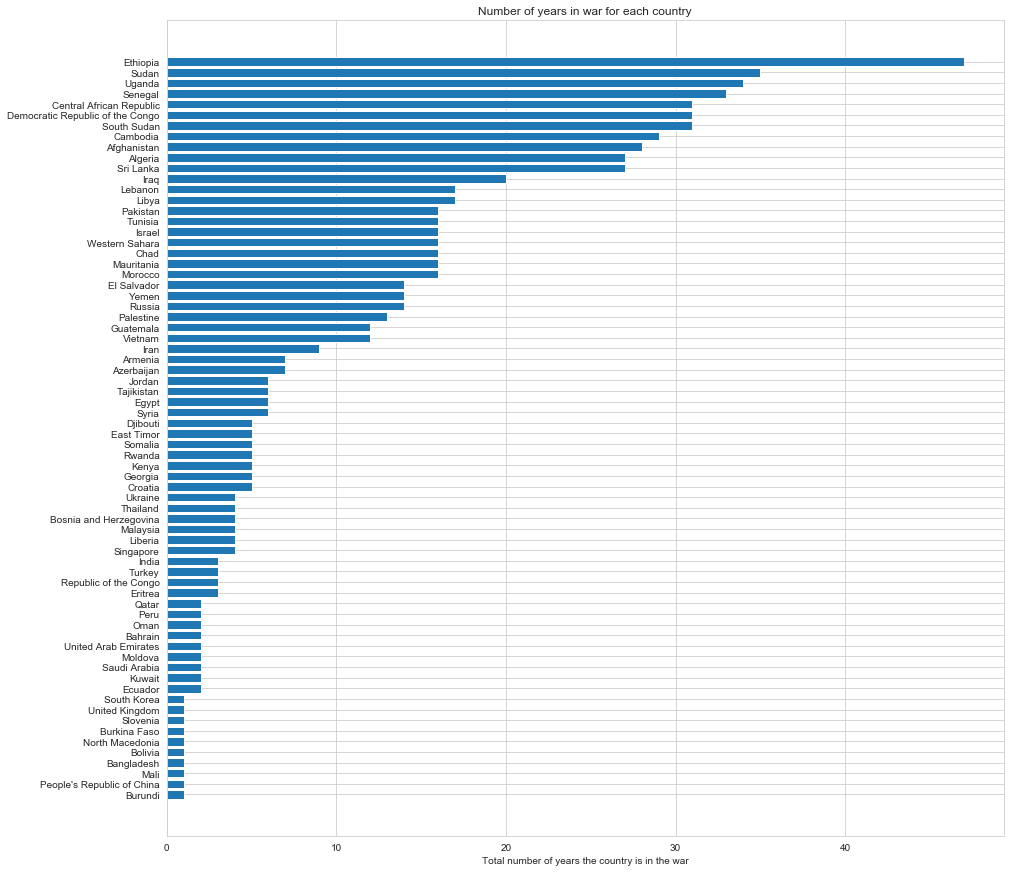

In [138]:
# Create a df that only contains the wars, the time ranges and the locations
country_wars_df = final_wars_df[['country', 'name', 'start_year', 'end_year']].drop_duplicates()

# Create a new column, range, in which we have all the years in which a country had a war
country_wars_df['years'] = country_wars_df.apply(
    # Create a range from the first to the last year of war (we want the last year to be taken in account)
    lambda row: list(range(row['start_year'].year, row['end_year'].year + 1)),
    axis=1
)

unique_years_df = (
    country_wars_df
        # Explode the years lists and take in consideration only country and years
        .explode('years')[['country', 'years']]
        # Remove overlapping years (which are duplicate (country, year) couples)
        .drop_duplicates()
        # Reset index after explode and drop newly created index column
        .reset_index()
        .drop('index', axis=1)
)

# Group by country to count the number of years in war the country had and sort
years_per_country = unique_years_df.groupby('country').count().sort_values(by='years').reset_index()

# Finally plot
plt.figure(figsize=(15,15))
plt.grid(True)
plt.barh(years_per_country['country'], years_per_country['years'])
plt.title('Number of years in war for each country')
_ = plt.xlabel('Total number of years the country is in the war')

We can easily see that luckily many countries did not have a war (e.g. European countries); some of them, on the other hand, have been in war for all the 57 years of observations.

But are long wars more or less common than short ones? Let us plot an histogram to make it clearer.

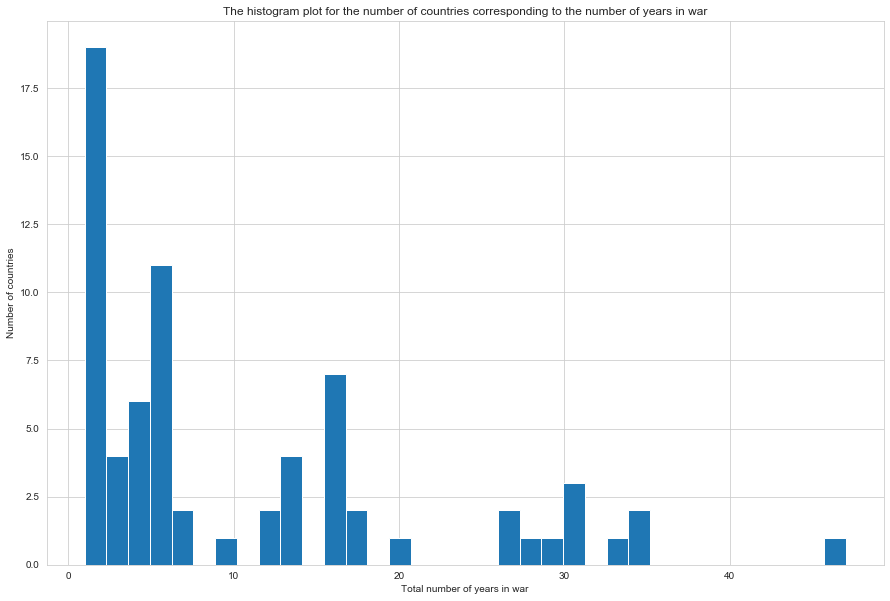

In [139]:
f, ax = plt.subplots(figsize=(15,10))
ax.hist(years_per_country['years'], bins=years_per_country.shape[0] // 2)
ax.set_title('The histogram plot for the number of countries corresponding to the number of years in war')
ax.set_xlabel('Total number of years in war')
_ = ax.set_ylabel('Number of countries')

Luckily enough, we can consider long wars quite exceptional.

#### Agriculture-related

Next, we want to plot the **total production of the crops per year and per country**, as an overall, general trend. In addition, we plot **similar** figures for the total amount of livestock for all countries, total agricultural area and total population, each per year and per country.

Before doing that let us check if the total periods of observation for each country are the same in order to exclude wrong interpretation of the data.

In [140]:
def sum_total_yearly_quantity(df):
    # Group by country and year, and sum the quantity up
    return  (
        df.groupby(['country', 'year'])
            .sum()
            .reset_index()
    )


# Sum the total production in all the datasets
total_productions_per_year_per_country = list(map(sum_total_yearly_quantity, replaced_agricultural_dfs))

# Unpack the list to individual dataframes
crop_per_year_per_country, \
livestock_per_year_per_country, \
population_per_year_per_country, \
land_per_year_per_country = total_productions_per_year_per_country

In [141]:
for name, df in zip(agricultural_dfs_names, total_productions_per_year_per_country):
    
    # Unique values in the total period of observations
    years_of_observations = df.groupby('country').count()['year'].unique()
    
    # Check if there is only one unique period (57 years) that corresponds to each country
    print('Years of observations for {} are the same for all countries: {}'.format(name, len(years_of_observations) == 1))

Years of observations for crops are the same for all countries: False
Years of observations for livestock are the same for all countries: False
Years of observations for population are the same for all countries: False
Years of observations for land are the same for all countries: False


As we can see, different countries have different years of collecting the data, let us show an example for the crop production.

In [142]:
# Get the unique numbers of monitored years
crop_years_observation = crop_per_year_per_country.groupby('country').count()['year'].unique()

crop_years_observation

array([57, 26, 18, 39, 55, 52, 25, 32, 24, 27, 12, 30, 31, 14,  6, 29, 50],
      dtype=int64)

`crop_years_observation` array represents the different periods of times in which the country collected the crop production data. We see that some countries made observations for **57** years, but some countries observed for **26**, **18**, etc years. This should affect the interpretation of the total crop production of all countries per year. 

Let us see have a quick glance at which countries collected data for a smaller period of time.

In [143]:
counted_data = crop_per_year_per_country.groupby('country').count().drop('value', axis=1)

for observation in crop_years_observation[1:]:
    print('{} years of observation for these countries: {}'.format(observation, counted_data[counted_data['year'] == observation].index.tolist()))

26 years of observation for these countries: ['Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Croatia', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova', 'North Macedonia', 'Russia', 'Slovenia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
18 years of observation for these countries: ['Belgium', 'Luxembourg']
39 years of observation for these countries: ['Belgium-Luxembourg']
55 years of observation for these countries: ['British Virgin Islands']
52 years of observation for these countries: ['Cayman Islands']
25 years of observation for these countries: ['Czechia', 'Eritrea', 'Slovakia']
32 years of observation for these countries: ['Czechoslovakia']
24 years of observation for these countries: ['Marshall Islands']
27 years of observation for these countries: ['Micronesia (Federated States of)']
12 years of observation for these countries: ['Montenegro', 'Serbia']
30 years of observation for these countries: ['Pacific Islands T

We can see that different countries have different periods of observations. 

- It make sense that the [USSR](https://en.wikipedia.org/wiki/Soviet_Union), [Czechoslovakia](https://en.wikipedia.org/wiki/Czechoslovakia), [Yugoslavia SFR](https://en.wikipedia.org/wiki/Socialist_Federal_Republic_of_Yugoslavia), [Former Sudan and South Sudan](https://en.wikipedia.org/wiki/2011_South_Sudanese_independence_referendum), [Pacific Islands Trust Territory](https://en.wikipedia.org/wiki/Trust_Territory_of_the_Pacific_Islands) and [Ethiopia PDR](https://en.wikipedia.org/wiki/People%27s_Democratic_Republic_of_Ethiopia) have smaller periods of data collection as they **no more exist**, and have been replaced by other countries. The same can be said about [CIS member states](https://en.wikipedia.org/wiki/Commonwealth_of_Independent_States), Czechia, Serbia and other countries have smaller periods as they became **independent** recently. We can also suppose that data about Belgium and Luxembourg have been gathered together in a unique datapoint each year, until 1999. Hence we can conclude that the discrepancy between data time periods caused by these events does not influence our data.

- For other countries (United States Virgin Islands, Marshall Islands, Cayman Islands, etc) we can say that their contributions to the total production of crops, total amount of livestock, population and agricultural land area is **unsignificant** as they are really small and not global production leaders.

57 years is a **period long enough** to observe important changes at national level. However, the visualisation of total value of crop production/livestock/land area should not be affected by the changes proviously discussed.

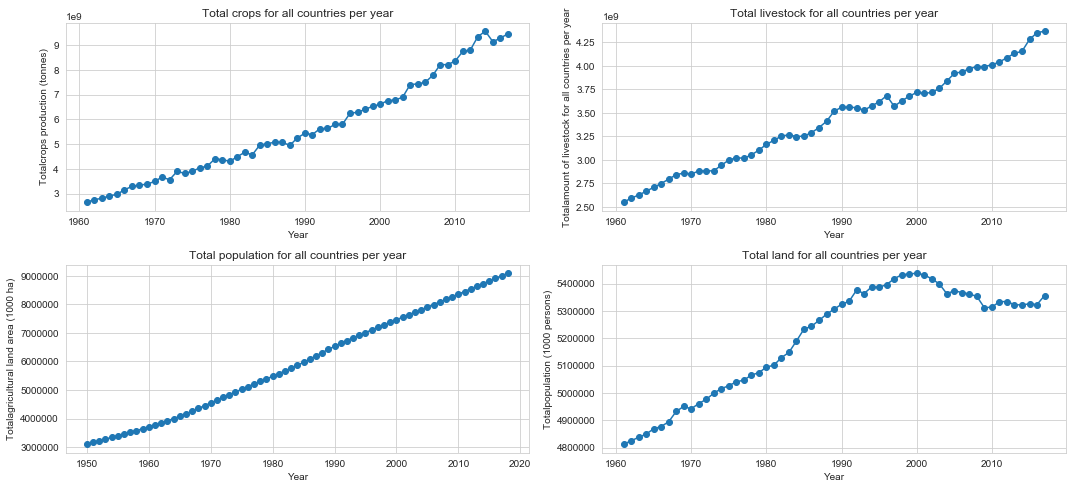

In [144]:
f, ax = plt.subplots(2, 2, figsize=(15, 7))

y_labels = [
    'crops production (tonnes)',
    'amount of livestock for all countries per year',
    'agricultural land area (1000 ha)',
    'population (1000 persons)'
]

for i, (df, name) in enumerate(zip(total_productions_per_year_per_country, agricultural_dfs_names)):
    prod_per_year = df.groupby('year').sum().reset_index()
    ax[i // 2, i % 2].plot_date(x=prod_per_year['year'], y=prod_per_year['value'], linestyle="-", xdate=True);
    ax[i // 2, i % 2].set_title(f'Total {name} for all countries per year')
    ax[i // 2, i % 2].set_xlabel('Year')
    ax[i // 2, i % 2].set_ylabel('Total' + y_labels[i])

f.tight_layout()

As expected, the total amount and production of goods **have increased** as well as the total population. Also we observe that the discrepancy of the time points of observation, indeed, does not influence the interpretation of the data. Interestingly, in the year 2000 the amount of agricultural land area reached its peak and then decreased. 

## Correlations

Our final aim is to **compare** the livestocks and agricultural production of different countries. Would it be fair though to compare big countries with tiny ones? Densely populated and almost uninhabited ones? We started looking for **normalisation** criteria. 
Of course, the *bare size* of a country is not a good normalization factor. What about Russia and its permafrost areas, or Egypt and its deserts?

We therefore came up with two factors that we believe to be more representative:
- **Agricultural area**: the actual amount of area used for cultivation. In this way we could compare the production expressed in [tonnes/km^2].This information is contained into the final_land_df.
- **Population**: the number of inhabitants of a country. In this way we could compare the production expressed in [tonnes-per-person] This information is contained into the final_population_df.

The following analysis has been done to understand if these criteria are valid and if we can really obtain more meaningful data by comparing normalised productions (both for area and population ) instead of the absolute one. In order to do so, we examined possible **correlations** between different observations in our datasets. 

First, let us calculate the correlation between **total production of crops**, the **amount of livestock** and the **agricultural area used** over the observed time period. If some time points are present in one dataset and missing in another, then we drop the row that corresponds to this time point. Also, now that we are digging deeper into the data, missing data could affect our results in a non-negligable way. Let us check this.

In [145]:
# Get a set representation of the countries for each dataset
crop_unique_countries = set(crop_per_year_per_country['country'].unique())
livestock_unique_countries = set(livestock_per_year_per_country['country'].unique())
population_unique_countries = set(population_per_year_per_country['country'].unique())
land_unique_countries = set(land_per_year_per_country['country'].unique())

# Get non-common countries
all_countries = crop_unique_countries.union(livestock_unique_countries, population_unique_countries, land_unique_countries)
intersected_set_of_countries = crop_unique_countries.intersection(livestock_unique_countries, population_unique_countries, land_unique_countries)
non_common_countries = all_countries.symmetric_difference(intersected_set_of_countries)
non_common_countries

{'Andorra',
 'Anguilla',
 'Aruba',
 'Bonaire, Sint Eustatius and Saba',
 'Channel Islands',
 'China, Macao SAR',
 'CuraÃ§ao',
 'Falkland Islands (Malvinas)',
 'Gibraltar',
 'Greenland',
 'Holy See',
 'Isle of Man',
 'Maldives',
 'Marshall Islands',
 'Mayotte',
 'Monaco',
 'Netherlands Antilles (former)',
 'Norfolk Island',
 'Northern Mariana Islands',
 'Palau',
 'Saint BarthÃ©lemy',
 'Saint-Martin (French Part)',
 'San Marino',
 'Sint Maarten (Dutch Part)',
 'Turks and Caicos Islands'}

The countries listed above are the non-overlapping countries, meaning that some data are missing. Most of them are not relevant for our project, hence we can exclude them for this initial analysis.

Now we can **merge** 4 agricultural datasets into one and calculate the Pearson correlations between 4 different features for each country: 

- Total crop production
- Total amount of livestock
- Total population
- Total agricultural land area

In [146]:
# Merge 4 datasets into one
merged_data = (crop_per_year_per_country 
                .merge(livestock_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'],
                    suffixes=('_crop', '_livestock'))
          
                .merge(population_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'])             
                .rename(columns={'value' : 'value_population'})
          
                .merge(land_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'])
                .rename(columns={'value' : 'value_land_area'})
         )

merged_data

country       year  value_crop  value_livestock  value_population  \
0      Afghanistan 1961-01-01   5909080.0       25104700.0          9169.410   
1      Afghanistan 1962-01-01   5934534.0       25442170.0          9351.441   
2      Afghanistan 1963-01-01   5686583.0       25605000.0          9543.205   
3      Afghanistan 1964-01-01   6147934.0       25855300.0          9744.781   
4      Afghanistan 1965-01-01   6274668.0       26205500.0          9956.320   
...            ...        ...         ...              ...               ...   
11311     Zimbabwe 2013-01-01   3531221.0       11489859.0         13350.373   
11312     Zimbabwe 2014-01-01   3637340.0        9437613.0         13586.707   
11313     Zimbabwe 2015-01-01   2519574.0        9458463.0         13814.629   
11314     Zimbabwe 2016-01-01   3054562.0       10676793.0         14030.331   
11315     Zimbabwe 2017-01-01   3158431.0       10755331.0         14236.595   

       value_land_area  
0              37700.0  
1              37760.0  
2              37810.0  
3              37873.0  
4              37875.0  
...                ...  
11311          16200.0  
11312          16200.0  
11313          16200.0  
11314          16200.0  
11315          16200.0  

[11316 rows x 6 columns]

In [147]:
# Calculate the correlation matrix for each country with 4 features
corr_data = merged_data.groupby('country').corr().fillna(0)

# Getting the paired correlations
crop_land_area_corr = corr_data.xs('value_crop', level=1)['value_land_area']
crop_population_corr = corr_data.xs('value_crop', level=1)['value_population']
livestock_population_corr = corr_data.xs('value_livestock', level=1)['value_population']

corr_data

value_crop  value_livestock  value_population  \
country                                                                       
Afghanistan value_crop          1.000000         0.295728          0.773567   
            value_livestock     0.295728         1.000000          0.064128   
            value_population    0.773567         0.064128          1.000000   
            value_land_area    -0.029503        -0.106985         -0.335440   
Albania     value_crop          1.000000         0.038380          0.591984   
...                                  ...              ...               ...   
Zambia      value_land_area     0.823103         0.942049          0.973502   
Zimbabwe    value_crop          1.000000         0.167213          0.079248   
            value_livestock     0.167213         1.000000          0.800283   
            value_population    0.079248         0.800283          1.000000   
            value_land_area    -0.032330         0.770684          0.938629   

                              value_land_area  
country                                        
Afghanistan value_crop              -0.029503  
            value_livestock         -0.106985  
            value_population        -0.335440  
            value_land_area          1.000000  
Albania     value_crop              -0.296381  
...                                       ...  
Zambia      value_land_area          1.000000  
Zimbabwe    value_crop              -0.032330  
            value_livestock          0.770684  
            value_population         0.938629  
            value_land_area          1.000000  

[876 rows x 4 columns]

A quick glance at the correlation matrix shows that some countries seem to rely more on livestock than on crop production to maitain their population growths. For example, in Afghanistan, we see that the population size has a very strong correlation with crop production and a nearly zero correlation with the total livestock. Looking at Zimbabwe, we see the exact opposite situation. We will plot these correlations in order to visualize the entire dataset.

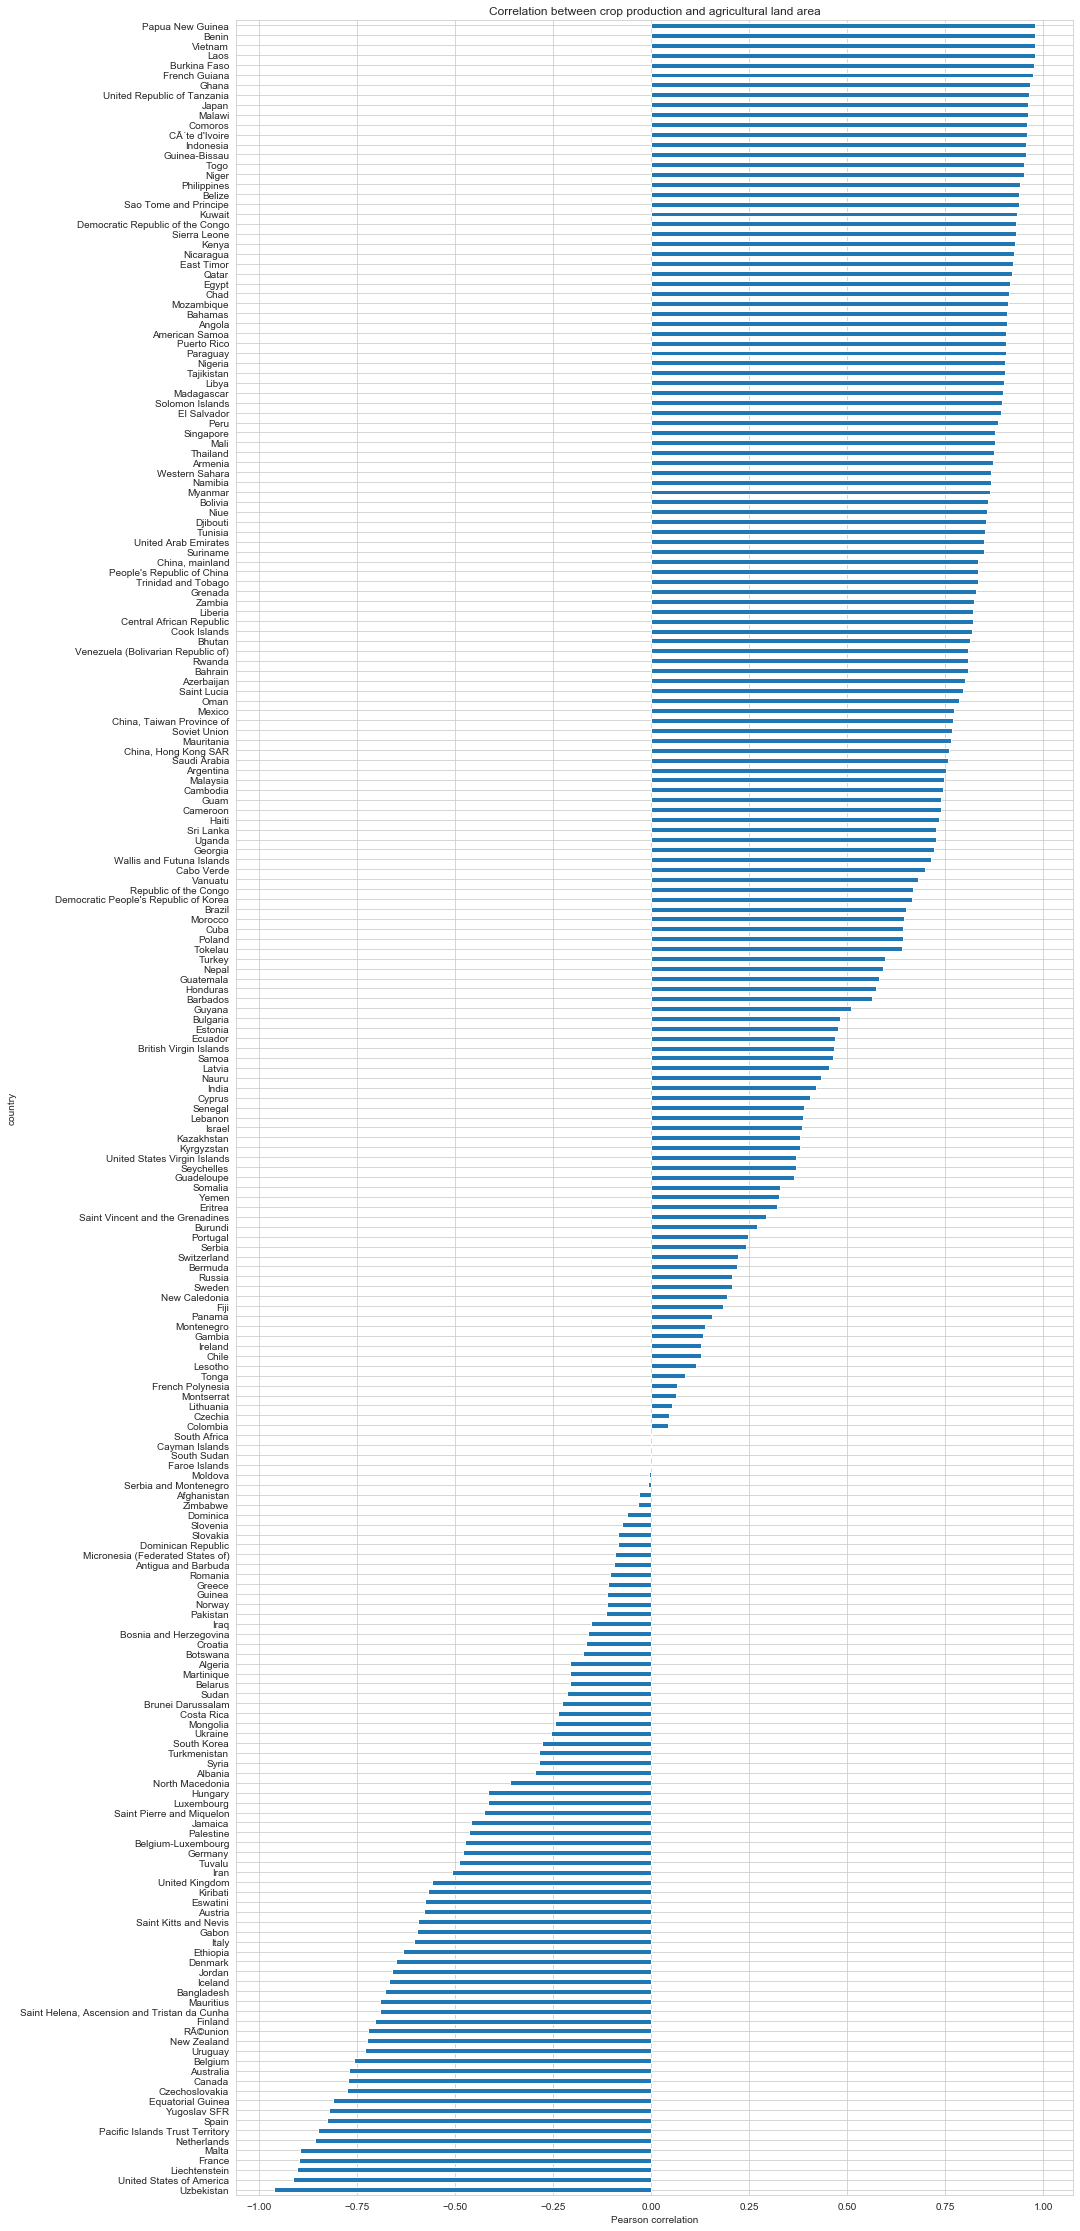

In [148]:
f, ax = plt.subplots(figsize=(15, 40))
crop_land_area_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between crop production and agricultural land area')
ax.set_xlabel('Pearson correlation');

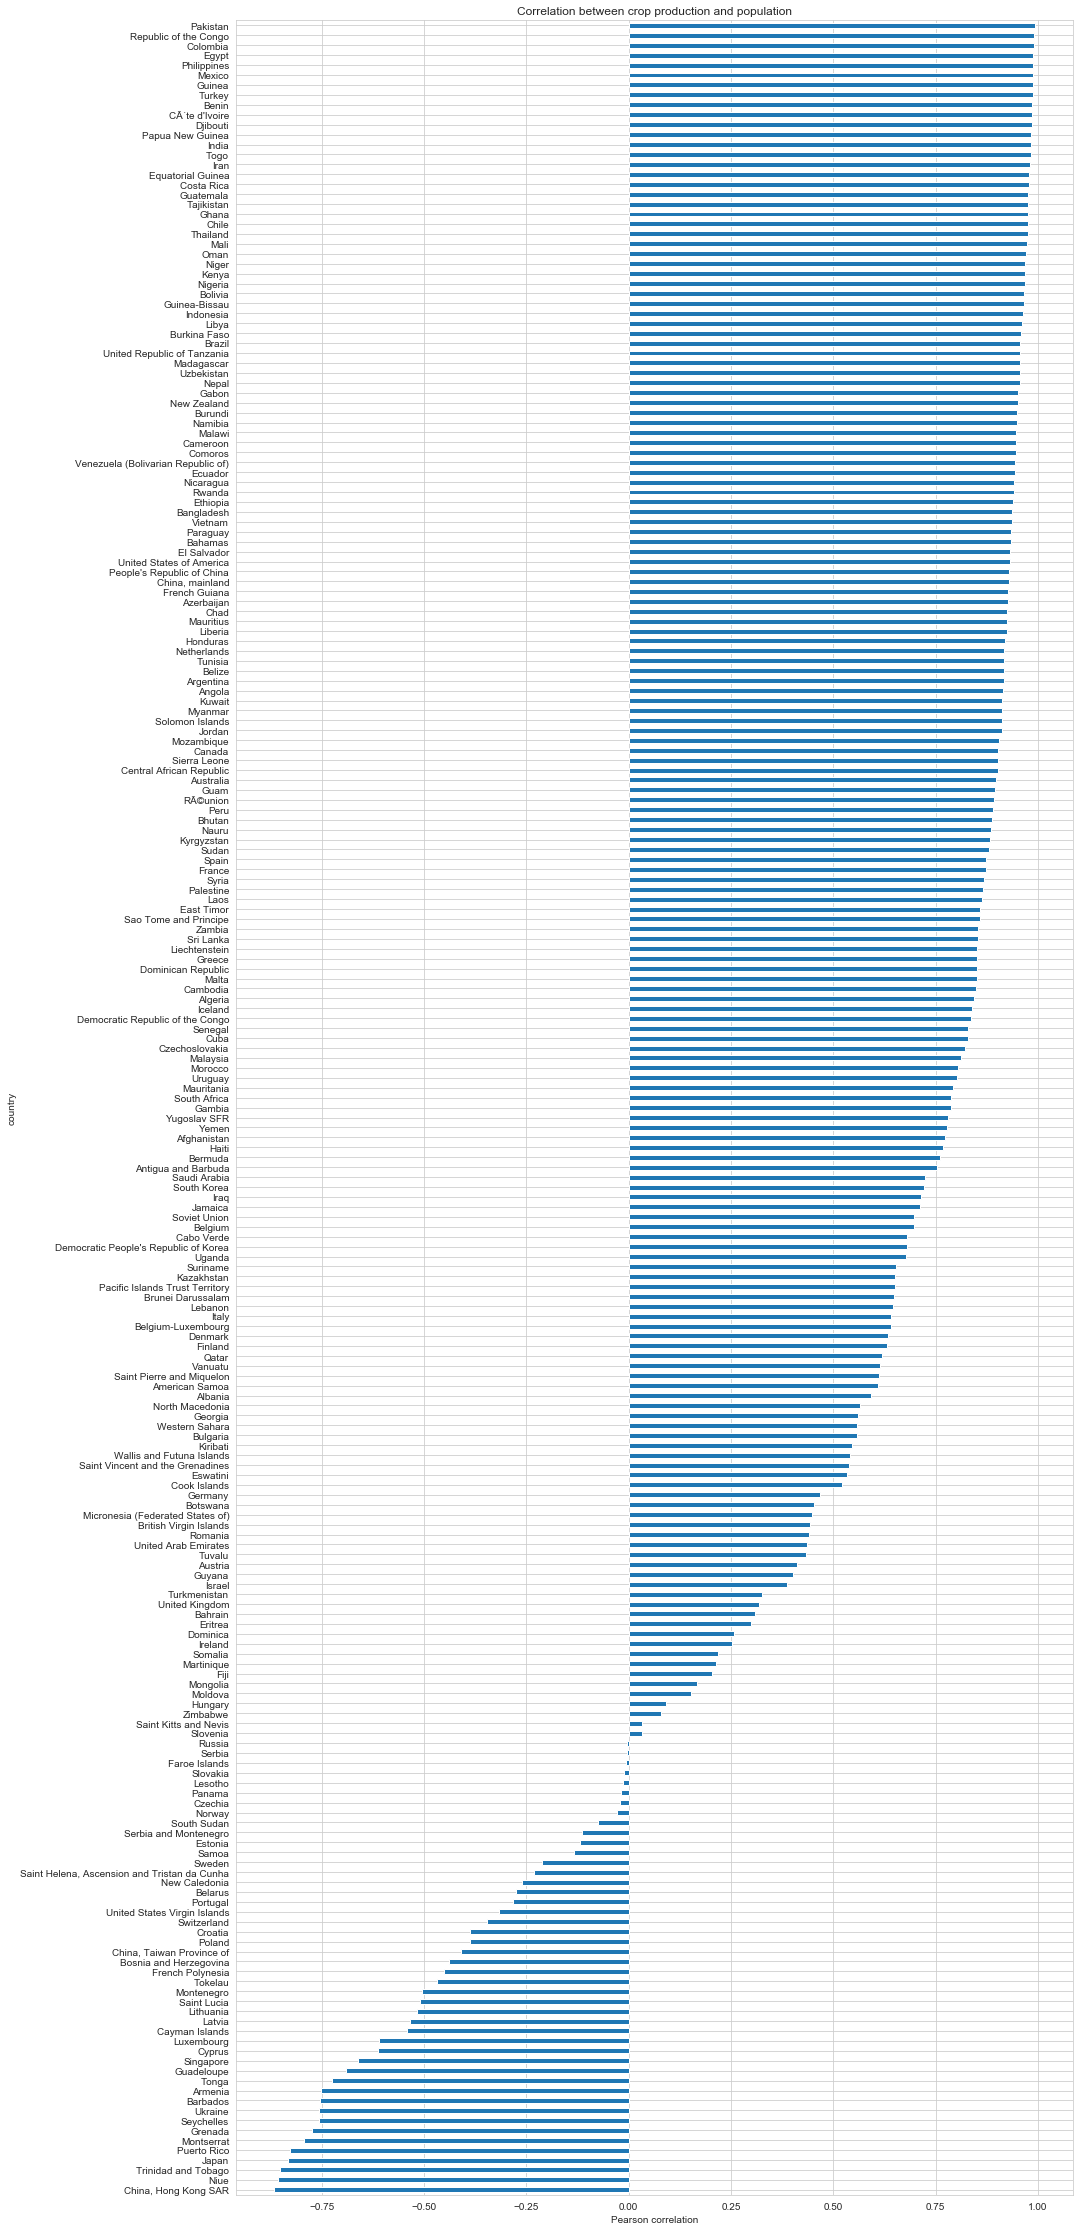

In [149]:
f, ax = plt.subplots(figsize=(15, 40))
crop_population_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between crop production and population')
ax.set_xlabel('Pearson correlation');

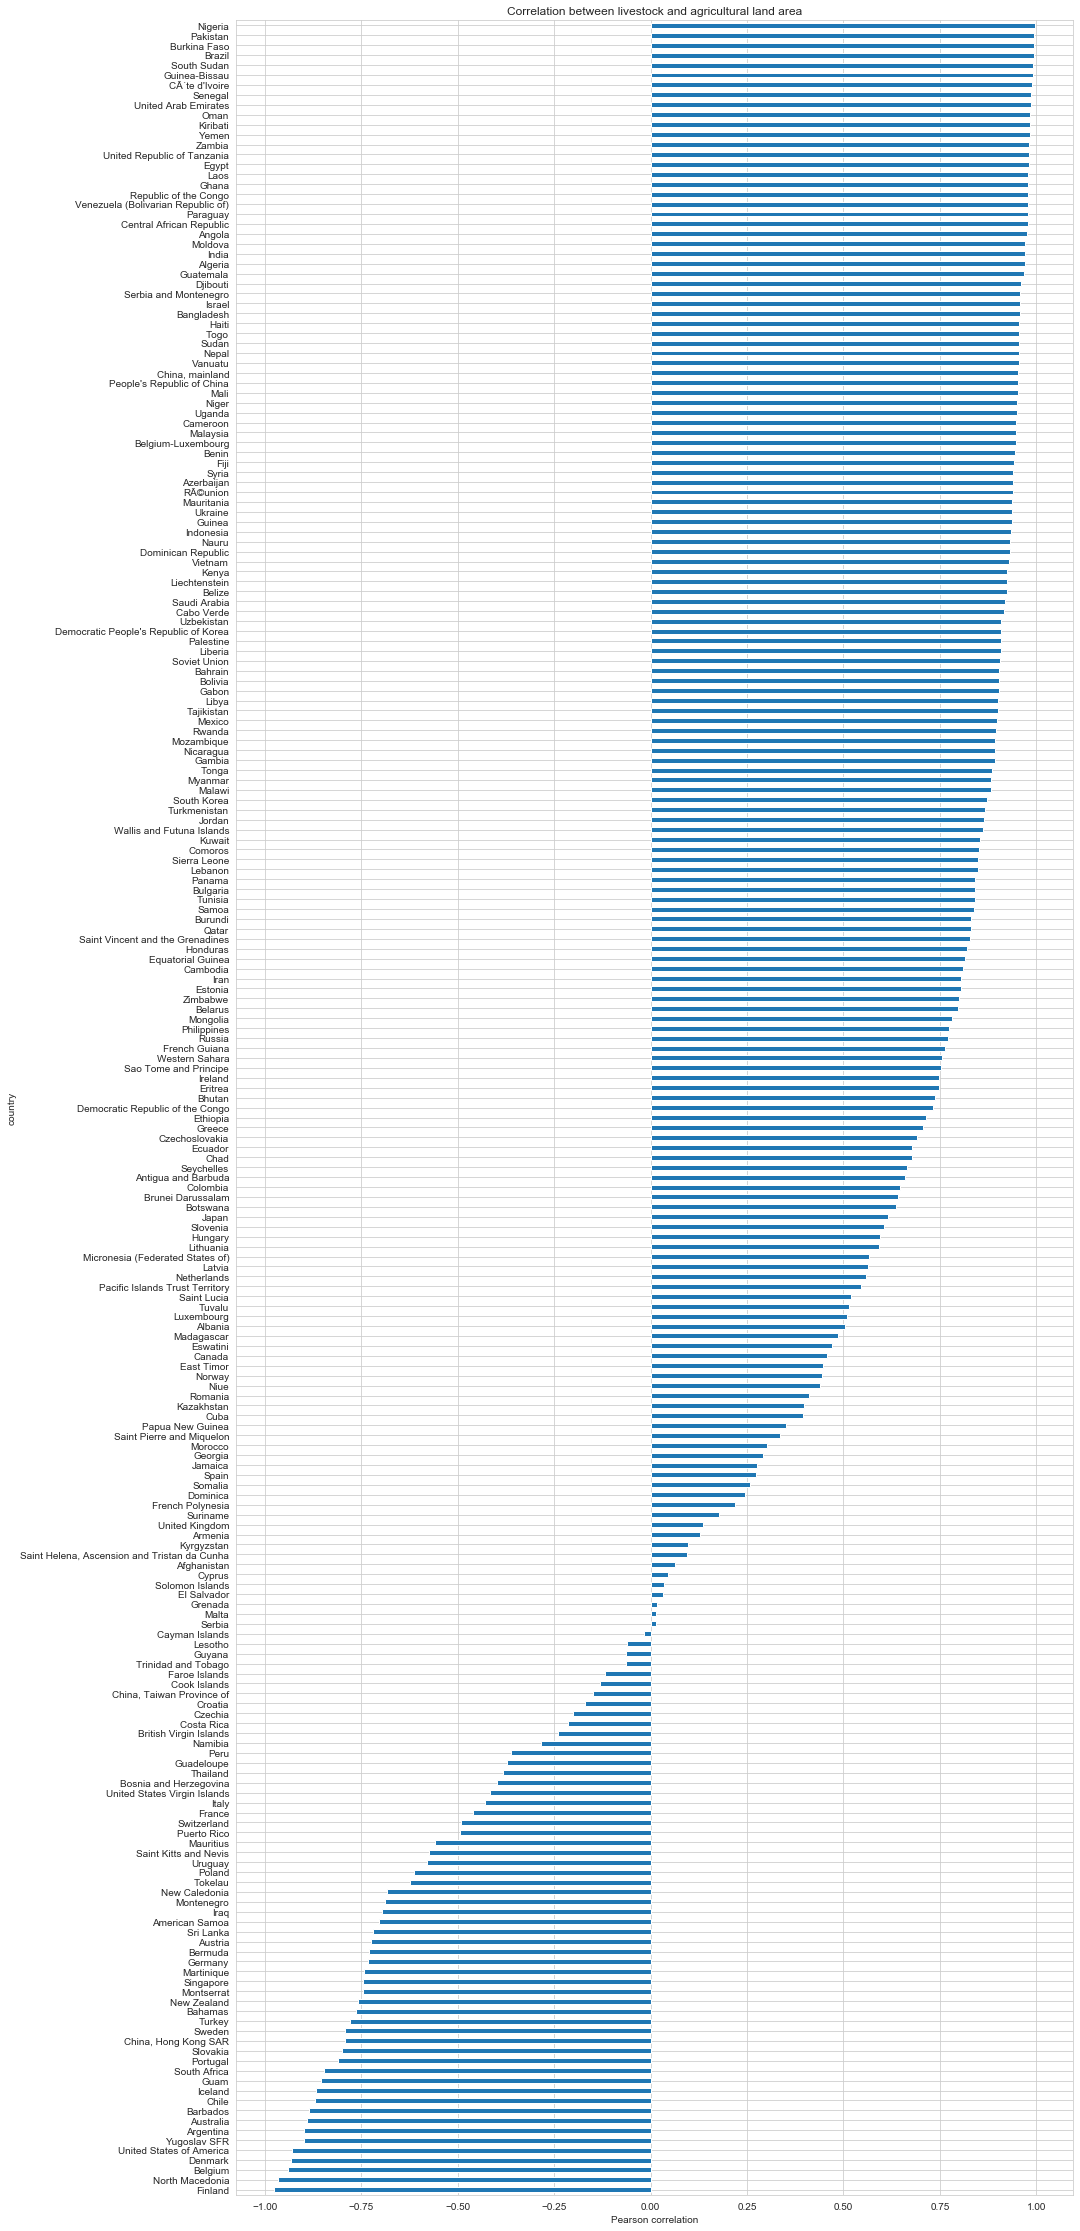

In [150]:
f, ax = plt.subplots(figsize=(15, 40))
livestock_population_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between livestock and agricultural land area')
ax.set_xlabel('Pearson correlation');

Surpisingly, the **correlation** between our features is very **variable** with time and this is true for each country.

- The increase of the **use of the land for agriculture** does not necessarily cause the increase of the **crop production** and vice versa.
- The increase of the **population** does not necessarily cause the increase of the **crop production** and vice versa.
- The increase of the **population** does not necessarily cause the increase in the amount of **livestock** and vice versa.

We can conclude that both the population and the agricultural land area are **not good normalising factors**. Therefore, we should treat every feature as an independent one for future analysis.

In [151]:
# Export dataframes to CSV for use in other notebooks

# export_csv = merged_data.to_csv(r'pandas_dfs/merged_data.csv', index = None, header=True)
# export_csv = years_per_country.to_csv(r'pandas_dfs/years_per_country.csv', index = None, header=True)
# export_csv = country_wars_df.to_csv(r'pandas_dfs/country_wars_df.csv', index = None, header=True)
# export_csv = final_wars_df.to_csv(r'pandas_dfs/final_wars_df.csv', index = None, header=True)

## Our Project

At this point of our analysis, it is clear that the data we are dealing with is **complex** and that we need to narrow down our project to a smaller more manageable scope if we are to obtain meaningful results. Therefore, our goal is not to describe the general production trends for all the countries as there are simply too many factors that make each country and each war unique. Because of this, we doubt that we would be able to come to any insightful conclusions with a more general approach. 

This is why we have decided to only **focus on few cases** that have grasped our attention, in order to better estimate the impact of war on their unique situations. 

To select countries of interest, we created a plotting function that displays the evolution of crop production during war and non-war years. After visualizing many different countries with our function, we have decided to dig deeper into the Lebanese Civil war. This war falls nicely in the middle of our data time frame, is a civil war and has lasted 15 years.

## Creation of plot to visualize Crop production vs. Year

In [152]:
# Import plotly 
import plotly.graph_objects as go
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [153]:
# Function to determine whether or not the country was in war during a specific year

def year_in_war(country_wars, year_row):

    year = year_row['year']
    
    for index, war_row in country_wars.iterrows():
        if war_row['start_year'] <= year <= war_row['end_year']:
            return True
    
    return False

In [154]:
def year_war_name(country_wars, year_row):
    year = year_row['year']
    
    for index, war_row in country_wars.iterrows():
        if war_row['start_year'] <= year <= war_row['end_year']:
            return country_wars.iloc[index, country_wars.columns.get_loc('name')]
    
    return 0

In [155]:
def country_in_war(wars_df, prod_per_year_per_country, country):
    country_wars = (
        wars_df[wars_df['country'].str.contains(country)]
            .groupby(['name', 'start_year', 'end_year'])
            .sum()
            .reset_index()
            .drop('is_state', axis=1)
    )

    country_crops = (
        prod_per_year_per_country[prod_per_year_per_country['country'] == country]
            .drop('country', axis=1)
    )
    
    country_crops['in_war'] = country_crops.apply(lambda row: year_in_war(country_wars, row), axis=1)
    
    country_crops['warName'] = country_crops.apply(lambda row: year_war_name(country_wars, row), axis=1)
    
    return country_crops

In [156]:
# Create a list of all unique country names in FAO dataset
list_countries = merged_data.country.unique()

In [157]:
# Create figure for Plotly. Here we add two separate traces to our plot in order to be able to color them differently.
# 

fig = go.Figure()

for country in list_countries:
        country_prod_war = country_in_war(final_wars_df, merged_data, country)
        prod_in_war = country_prod_war.copy()
        prod_no_war = country_prod_war.copy()

        prod_in_war['value_crop'][~prod_in_war['in_war']] = None
        prod_no_war['value_crop'][prod_no_war['in_war']] = None


        # Add data for years not in war
        fig.add_trace(go.Scatter( x=prod_no_war["year"], y=prod_no_war["value_crop"],
                        mode='lines+markers',
                        name='No conflict',
                        hovertext='Not in Conflict',
                        hoverinfo="text",
                        connectgaps=False,
                        visible = False,
                        line=dict(color='RGB(142, 141, 138)', width=2)))

        # Add data for in war years
        fig.add_trace(go.Scatter(x=prod_in_war["year"], y=prod_in_war["value_crop"],
                        mode='lines+markers',
                        name='In war',
                        connectgaps=False,
                        hovertext='In war',
                        hoverinfo="text",
                        visible = False,
                        line=dict(color='RGB(232, 90, 79)', width=2)))

        
        fig.update_layout(title='Crop Production',
                           xaxis_title='Year',
                           yaxis_title='Total Production (Tonnes)',
                           plot_bgcolor = "White"
                          )
        fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='RGB(234, 231, 220)')
        fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='RGB(234, 231, 220)')

C:\Users\Mike\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mike\Anaconda3\envs\ada\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
# Here we create the list of countries that will appear in our drop down menu in addition to setting the correct 
# traces visible for each option

buttons = []

buttons.append(dict(method='update',
                args=[{'visible': [False]*len(list_countries)*2}],
                label='Select Country'))

for i in range(0, len(list_countries)):
    show = [False]*len(list_countries)*2
    show[i*2] = True
    show[i*2+1] = True
    but = dict(method='update',
                args=[{'visible': show}],
                label=list_countries[i])
    buttons.append(but)

In [178]:
# Here we create the menu using the buttons created above
menus=list([dict(x=0.25, y=1.15, yanchor='top', xanchor='left',  buttons= buttons)])

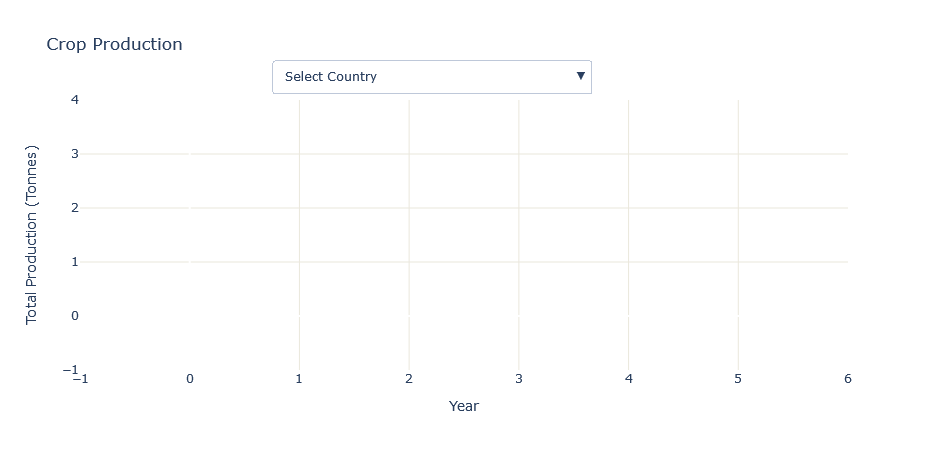

In [179]:
fig.update_layout(legend=dict(x=0.8, y=1.15))

fig.update_layout(updatemenus = menus) 

In [180]:
# Run this cell to create an HTML object of the above figure
plotly.offline.plot(fig, filename='crops-vs-year.html')

'crops-vs-year.html'

## Creation of scatter plot showing rates of change during war and peace

In [101]:
# Function to compute rate of change of crop production from one year to another. Calculated as a % increase and added to a new
# column.

def compute_rate(final_wars_df, country, agricultural_data):
    try:
        country_crops = (
            agricultural_data[agricultural_data['country'] == country]
            .drop(['value_population', 'value_land_area', 'value_livestock'], axis=1)
            .reset_index(drop=True)
        )

        years_in_war = country_in_war(final_wars_df, country_crops, country)

        first_row = pd.DataFrame({'in_war': False, 'value_crop': 0, 'year': np.NaN}, index=[0])

        country_shifted = (
            pd.concat([first_row, years_in_war[:]], sort=False).reset_index(drop=True)
              .drop(['year'], axis=1)[:-1]
              .rename(columns={'value_crop': 'previous_crop'})
        )

        rated_crops = pd.concat([country_shifted, country_crops], axis=1)[1:].reset_index(drop=True)

        rated_crops['rate'] = rated_crops.apply(lambda row: (row['value_crop'] - row['previous_crop'])/row['previous_crop']*100, axis=1)

        grouped_rated_crops = rated_crops.groupby('in_war').mean().reset_index()

        rate_in_war = grouped_rated_crops.loc[grouped_rated_crops['in_war'] == True, 'rate'].to_numpy()
        rate_not_in_war = grouped_rated_crops.loc[grouped_rated_crops['in_war'] == False, 'rate'].to_numpy()

        return rate_in_war[0], rate_not_in_war[0]
    except:
        print(country)

In [105]:
# Test the function...
compute_rate(final_wars_df, "Slovenia", merged_data)

Slovenia


## Next 4 cells are for trying to figure out the error with South Sudan and Palestine

In [107]:
country_crops = (
            merged_data[merged_data['country'] == 'Palestine']
            .drop(['value_population', 'value_land_area', 'value_livestock'], axis=1)
            .reset_index(drop=True)
        )

years_in_war = country_in_war(final_wars_df, country_crops, 'Palestine')

In [108]:
first_row = pd.DataFrame({'in_war': False, 'value_crop': 0, 'year': np.NaN}, index=[0])

country_shifted = (
        pd.concat([first_row, years_in_war[:]], sort=False).reset_index(drop=True)
        .drop(['year'], axis=1)[:-1]
        .rename(columns={'value_crop': 'previous_crop'})
    )

In [109]:
country_shifted

in_war  previous_crop                    warName
0    False            0.0                        NaN
1    False            0.0                          0
2    False            0.0                          0
3    False            0.0                          0
4    False            0.0                          0
5    False            0.0                          0
6    False            0.0                          0
7     True            0.0                Six-Day War
8    False            0.0                          0
9    False            0.0                          0
10   False            0.0                          0
11   False            0.0                          0
12   False            0.0                          0
13   False            0.0                          0
14   False            0.0                          0
15   False            0.0                          0
16   False            0.0                          0
17   False            0.0                          0
18   False            0.0                          0
19   False            0.0                          0
20   False            0.0                          0
21   False            0.0                          0
22   False            0.0                          0
23   False            0.0                          0
24   False            0.0                          0
25   False            0.0                          0
26   False            0.0                          0
27   False            0.0                          0
28   False            0.0                          0
29   False            0.0                          0
30   False            0.0                          0
31   False            0.0                          0
32   False            0.0                          0
33   False            0.0                          0
34   False       873405.0                          0
35   False      1129477.0                          0
36   False      1079673.0                          0
37   False      1113407.0                          0
38   False      1111547.0                          0
39   False       989984.0                          0
40   False      1116168.0                          0
41   False      1058002.0                          0
42   False      1177835.0                          0
43   False      1019526.0                          0
44   False      1049176.0                          0
45   False      1045818.0                          0
46    True      1105209.0       Gaza–Israel conflict
47    True      1077630.0       Gaza–Israel conflict
48    True      1127869.0                   Gaza War
49    True       970141.0                   Gaza War
50    True       683873.0       Gaza–Israel conflict
51    True       823589.0       Gaza–Israel conflict
52    True       902004.0       Gaza–Israel conflict
53    True       995308.0       Gaza–Israel conflict
54    True       952129.0  2014 Israel–Gaza conflict
55    True       919888.0       Gaza–Israel conflict
56    True       926579.0       Gaza–Israel conflict

In [110]:
rated_crops = pd.concat([country_shifted, country_crops], axis=1)[1:].reset_index(drop=True)

rated_crops['rate'] = rated_crops.apply(lambda row: (row['value_crop'] - row['previous_crop'])/row['previous_crop']*100, axis=1)


ZeroDivisionError: ('float division by zero', 'occurred at index 0')

In [111]:
rated_crops.head()

in_war  previous_crop                            warName      country  \
0    True      2936220.0  Lord's Resistance Army insurgency  South Sudan   
1    True      3312500.0  Lord's Resistance Army insurgency  South Sudan   
2    True      4104473.0  Lord's Resistance Army insurgency  South Sudan   
3    True      3147626.0  Lord's Resistance Army insurgency  South Sudan   
4    True      3051803.0  Lord's Resistance Army insurgency  South Sudan   

        year  value_crop       rate  
0 2013-01-01   3312500.0  12.815116  
1 2014-01-01   4104473.0  23.908619  
2 2015-01-01   3147626.0 -23.312299  
3 2016-01-01   3051803.0  -3.044294  
4 2017-01-01   2959170.0  -3.035353

In [112]:
temp = merged_data.loc[merged_data['country'].str.contains('Palestine')]
temp2 = wars_rate_df.loc[wars_rate_df['country'].str.contains('Palestine')]
temp2

name    country   end_year  is_state  \
83                     Gaza War  Palestine 2009-01-01      True   
84                     Gaza War  Palestine 2009-01-01      True   
343   2014 Israel–Gaza conflict  Palestine 2014-01-01      True   
344   2014 Israel–Gaza conflict  Palestine 2014-01-01      True   
345   2014 Israel–Gaza conflict  Palestine 2014-01-01      True   
347   2014 Israel–Gaza conflict  Palestine 2014-01-01      True   
773        Gaza–Israel conflict  Palestine 2017-01-01      True   
774        Gaza–Israel conflict  Palestine 2017-01-01      True   
791                 Six-Day War  Palestine 1967-01-01      True   
792                 Six-Day War  Palestine 1967-01-01      True   
793                 Six-Day War  Palestine 1967-01-01      True   
794                 Six-Day War  Palestine 1967-01-01      True   
795                 Six-Day War  Palestine 1967-01-01      True   
796                 Six-Day War  Palestine 1967-01-01      True   
801        Gaza–Israel conflict  Palestine 2017-01-01     False   
853   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
854   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
855   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
856   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
857   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
858   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
859   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
860   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
861   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
862   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
863   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
864   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
865   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
866   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
867   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
868   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
869   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
870   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
871   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
872   2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
879                    Gaza War  Palestine 2009-01-01     False   
880                    Gaza War  Palestine 2009-01-01     False   
881                    Gaza War  Palestine 2009-01-01     False   
885                    Gaza War  Palestine 2009-01-01     False   
887                    Gaza War  Palestine 2009-01-01     False   
889                    Gaza War  Palestine 2009-01-01     False   
891                    Gaza War  Palestine 2009-01-01     False   
892                    Gaza War  Palestine 2009-01-01     False   
1062       Gaza–Israel conflict  Palestine 2017-01-01     False   
1069  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1070  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1071  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1072  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1073  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1074  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1075  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1076  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1077  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1078  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1080  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1081  2014 Israel–Gaza conflict  Palestine 2014-01-01     False   
1084                   Gaza War  Palestine 2009-01-01     False   
1085                   Gaza War  Palestine 2009-01-01     False   
1089                   Gaza War  Palestine 2009-01-01     False   
1090   

In [106]:
# Create copy of final_wars_df in order to keep it as the original
wars_rate_df = final_wars_df.copy()

# Apply the compute rate function to each row in wars_rate_df and split the result into two new columns
wars_rate_df['rate-change'] = wars_rate_df.apply(lambda x: compute_rate(wars_rate_df, x['country'], merged_data), axis=1)

# Split rates column into 2 separate columns and drop the rate-change column

wars_rate_df[['rate-war', 'rate-no-war']] = pd.DataFrame(wars_rate_df['rate-change'].tolist(), index=wars_rate_df.index)
wars_rate_df.drop(['rate-change'], axis=1, inplace=True)

Palestine
Palestine
Slovenia
Palestine
Palestine
Palestine
Palestine
South Sudan
South Sudan
South Sudan
South Sudan
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine
Palestine


In [120]:
# Add the amount of years each country was in war using the years_per_country dataframe created before

wars_rate_df = pd.merge(wars_rate_df, years_per_country, left_on='country', right_on='country')

In [124]:
# Removing Moldova to see the result. Moldova only has one year in war (first year for which we have data)
# and shows an increase of 50% production during this one year.
# I just removed these two outliers to make the graph easier to see for now
wars_rate_df = wars_rate_df[wars_rate_df['country'] != 'Moldova']
wars_rate_df = wars_rate_df[wars_rate_df['country'] != 'Qatar']

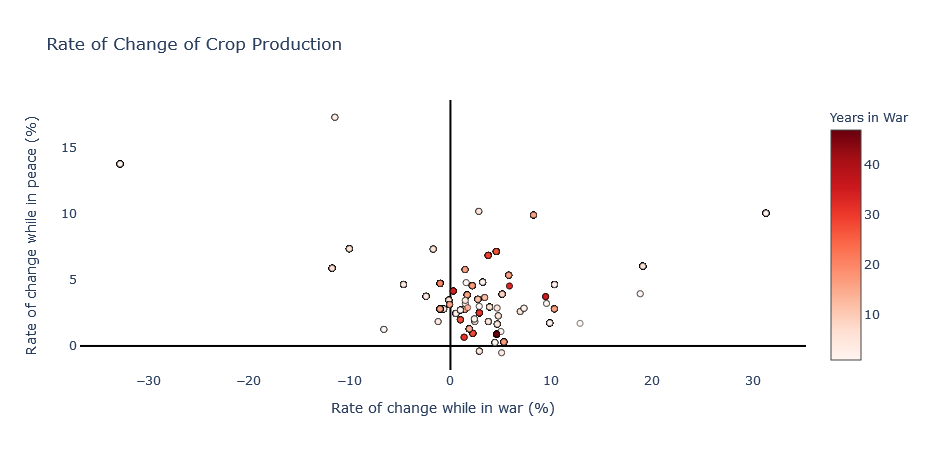

In [155]:
# Plot the scatter plot

import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=wars_rate_df['rate-war'], 
    y=wars_rate_df['rate-no-war'],
    hovertext=wars_rate_df['country'],
    mode='markers',
    marker=dict(colorscale='Reds',
               color = wars_rate_df['years'],
               line=dict(width=0.5,
                        color='Black'),
               showscale=True,
               colorbar=dict(
                    title="Years in War"
        ),
               )
))

fig.update_layout(
    title_text = 'Rate of Change of Crop Production',
    showlegend = False,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis = go.layout.XAxis(
        side = 'bottom',
        type = 'linear',
        title = 'Rate of change while in war (%)',
        mirror =  True,
        showline = True,
        gridcolor = 'rgb(255, 255, 255)',
        gridwidth = 1,
        fixedrange = True,
        zerolinewidth = 1),
    yaxis = go.layout.YAxis(
        type = 'linear',
        title = 'Rate of change while in peace (%)',
        mirror =  True,
        showline = True,
        gridcolor = 'rgb(255,255, 255)',
        gridwidth = 2,
        fixedrange = True,
        zerolinewidth = 1),
    
)

fig.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Black')
fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='Black')

fig.show()

In [156]:
# Run this cell to create an HTML object of the above figure
# plotly.offline.plot(fig, filename='crop-rate.html')

'crop-rate.html'

## Creating the Agricultural distribution Map

In [139]:
import json

In [140]:
# Function to load a GeoJson file

def load_geoJson(file_in):
    
    with open(file_in) as file_in:
        districts = json.load(file_in)
    
    district_features = districts['features']
    
    return district_features

In [141]:
# Function to create a dict from the geoJson file

def create_geoDict (geoJson):
    
    geoJSON=dict(type= 'FeatureCollection', 
             features = [])
    
    for k, tfeature in enumerate(geoJson):
        geo_feature = dict(id=tfeature['properties']['DISTRICT'], type= "Feature")
        geo_feature['properties'] = tfeature['properties']
        geo_feature['geometry'] = tfeature['geometry']  
        geoJSON['features'].append(geo_feature)
        
    return geoJSON

In [146]:
# Load our geojson file
file_in = '2009_districts.geojson'
districts_geo = load_geoJson(file_in)
districts_geo_dict = create_geoDict (districts_geo)

In [149]:
# Create df in which to hard code values. Here, the data we are using is from an Atlas on Lebanon (Reference)
# Hence, we must input the values manually into our dataframe

districts_list = [d['properties']['DISTRICT'] for d in districts_geo]
districts_df = pd.DataFrame(districts_list)
districts_df.rename(columns={0: "district"}, inplace=True)
districts_df.head()

district
0    Bent Jbayl
1     Nabatiyeh
2  Beirut-three
3        Zahleh
4          Aley

In [150]:
# hard code values for each district - Agriculture (in area Hectares Ha)

districts_df.loc[districts_df['district'] == 'Bent Jbayl', 'agriculture'] = 12000
districts_df.loc[districts_df['district'] == 'Nabatiyeh', 'agriculture'] = 13250
districts_df.loc[districts_df['district'] == 'Beirut-three', 'agriculture'] = 0
districts_df.loc[districts_df['district'] == 'Zahleh', 'agriculture'] = 24500
districts_df.loc[districts_df['district'] == 'Aley', 'agriculture'] = 7750
districts_df.loc[districts_df['district'] == 'Baabda', 'agriculture'] = 4000
districts_df.loc[districts_df['district'] == 'Chouf', 'agriculture'] = 6000
districts_df.loc[districts_df['district'] == 'Jbayl', 'agriculture'] = 6750
districts_df.loc[districts_df['district'] == 'Kesrouan', 'agriculture'] = 3000
districts_df.loc[districts_df['district'] == 'Matn', 'agriculture'] = 4000
districts_df.loc[districts_df['district'] == 'Akkar', 'agriculture'] = 37000
districts_df.loc[districts_df['district'] == 'Batroun', 'agriculture'] = 6500
districts_df.loc[districts_df['district'] == 'Bcharreh', 'agriculture'] = 2500
districts_df.loc[districts_df['district'] == 'Koura', 'agriculture'] = 10500
districts_df.loc[districts_df['district'] == 'Miniyeh-Danniyeh', 'agriculture'] = 8750
districts_df.loc[districts_df['district'] == 'Tripoli', 'agriculture'] = 1500
districts_df.loc[districts_df['district'] == 'Zgharta', 'agriculture'] = 9000
districts_df.loc[districts_df['district'] == 'Jezzine', 'agriculture'] = 3750
districts_df.loc[districts_df['district'] == 'Saida', 'agriculture'] = 1000
districts_df.loc[districts_df['district'] == 'Sour', 'agriculture'] = 17000
districts_df.loc[districts_df['district'] == 'Zahrany', 'agriculture'] = 16000
districts_df.loc[districts_df['district'] == 'Beirut-two', 'agriculture'] = 0
districts_df.loc[districts_df['district'] == 'Beirut-one', 'agriculture'] = 0
districts_df.loc[districts_df['district'] == 'Baalbek-Hermel', 'agriculture'] = 77000
districts_df.loc[districts_df['district'] == 'WestBekaa-Rachaya', 'agriculture'] = 30000
districts_df.loc[districts_df['district'] == 'Marjayoun-Hasbaya', 'agriculture'] = 19500

districts_df.head()

district  agriculture
0    Bent Jbayl      12000.0
1     Nabatiyeh      13250.0
2  Beirut-three          0.0
3        Zahleh      24500.0
4          Aley       7750.0

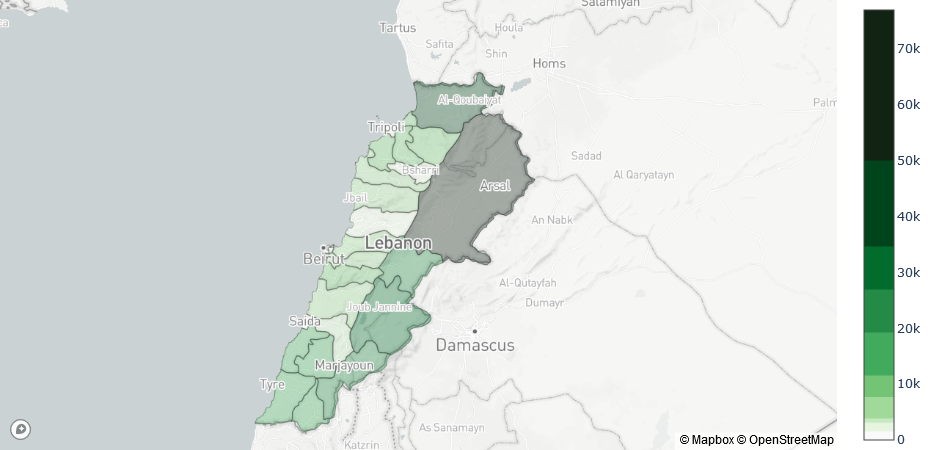

In [154]:
# Still need to move token :P
# Created a custom color scale to better fit the distribution of our data

mapbox_access_token = 'pk.eyJ1IjoibWlrZS1lcGZsIiwiYSI6ImNrNDVmZHc0ZjA4M2MzbW15azFndW90dzEifQ.zJ5nfu7uke4E-mW4Y9hV9g'


fig = go.Figure(go.Choroplethmapbox(geojson=districts_geo_dict, locations = districts_df.district ,
                                    z=districts_df['agriculture'],
                                    colorscale=[
                                        # Let first 1% (0.01) of the values have color rgb(250, 250, 250)
                                        [0, "rgb(250, 250, 250)"],
                                        [0.02, "rgb(250, 250, 250)"],

                                        [0.02, "rgb(229, 245, 224)"],
                                        [0.04, "rgb(229, 245, 224)"],

                                        [0.04, "rgb(199, 233, 192)"],
                                        [0.05, "rgb(199, 233, 192)"],

                                        [0.05, "rgb(161, 217, 155)"],
                                        [0.10, "rgb(161, 217, 155)"],

                                        [0.10, "rgb(116, 196, 118)"],
                                        [0.15, "rgb(116, 196, 118)"],

                                        [0.15, "rgb(65, 171, 93)"],
                                        [0.25, "rgb(65, 171, 93)"],

                                        [0.25, "rgb(35, 139, 69)"],
                                        [0.35, "rgb(35, 139, 69)"],

                                        [0.35, "rgb(0, 109, 44)"],
                                        [0.45, "rgb(0, 109, 44)"],

                                        [0.45, "rgb(0, 68, 27)"],
                                        [0.65, "rgb(0, 68, 27)"],
                                        
                                        [0.65, "rgb(17, 36, 20)"],
                                        [1.0, "rgb(17, 36, 20)"]
                                    ],

                                    zmin=0, zmax=77000, marker_line_width=1, showscale = True, 
                                    marker_opacity=0.35))

fig.update_layout(
     mapbox=go.layout.Mapbox(
                  accesstoken=mapbox_access_token),
                  mapbox_zoom=7, mapbox_center = {"lon": 36, "lat": 34},
                  margin={"r":0,"t":0,"l":0,"b":0},
                 
                 )


fig.show()